In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [12]:
#DATA PREPROCESSING

airline= pd.read_excel('C:\/Users\Acer\Desktop\ML\DATA\EastWestAirlines.xlsx',sheet_name='data')

In [13]:
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [14]:
airline.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [15]:
airline.info()

#(there are no null values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [42]:
#SCALING

scaler= MinMaxScaler()
scaled_airline= scaler.fit_transform(airline)
''' (i-min)/(max-min) '''

#(minmax scaler is used to normalize the data)

' (i-min)/(max-min) '

In [43]:
scaled_airline

array([[0.00000000e+00, 1.65077268e-02, 0.00000000e+00, ...,
        8.43742464e-01, 0.00000000e+00, 2.50000000e-01],
       [2.48756219e-04, 1.12878760e-02, 0.00000000e+00, ...,
        8.39884254e-01, 0.00000000e+00, 2.50000000e-01],
       [4.97512438e-04, 2.42568502e-02, 0.00000000e+00, ...,
        8.47841813e-01, 0.00000000e+00, 2.50000000e-01],
       ...,
       [9.99502488e-01, 4.31694976e-02, 0.00000000e+00, ...,
        1.68796721e-01, 1.00000000e+00, 2.50000000e-01],
       [9.99751244e-01, 3.22018866e-02, 0.00000000e+00, ...,
        1.68676151e-01, 0.00000000e+00, 2.50000000e-01],
       [1.00000000e+00, 1.76908304e-03, 0.00000000e+00, ...,
        1.68314444e-01, 0.00000000e+00, 2.50000000e-01]])

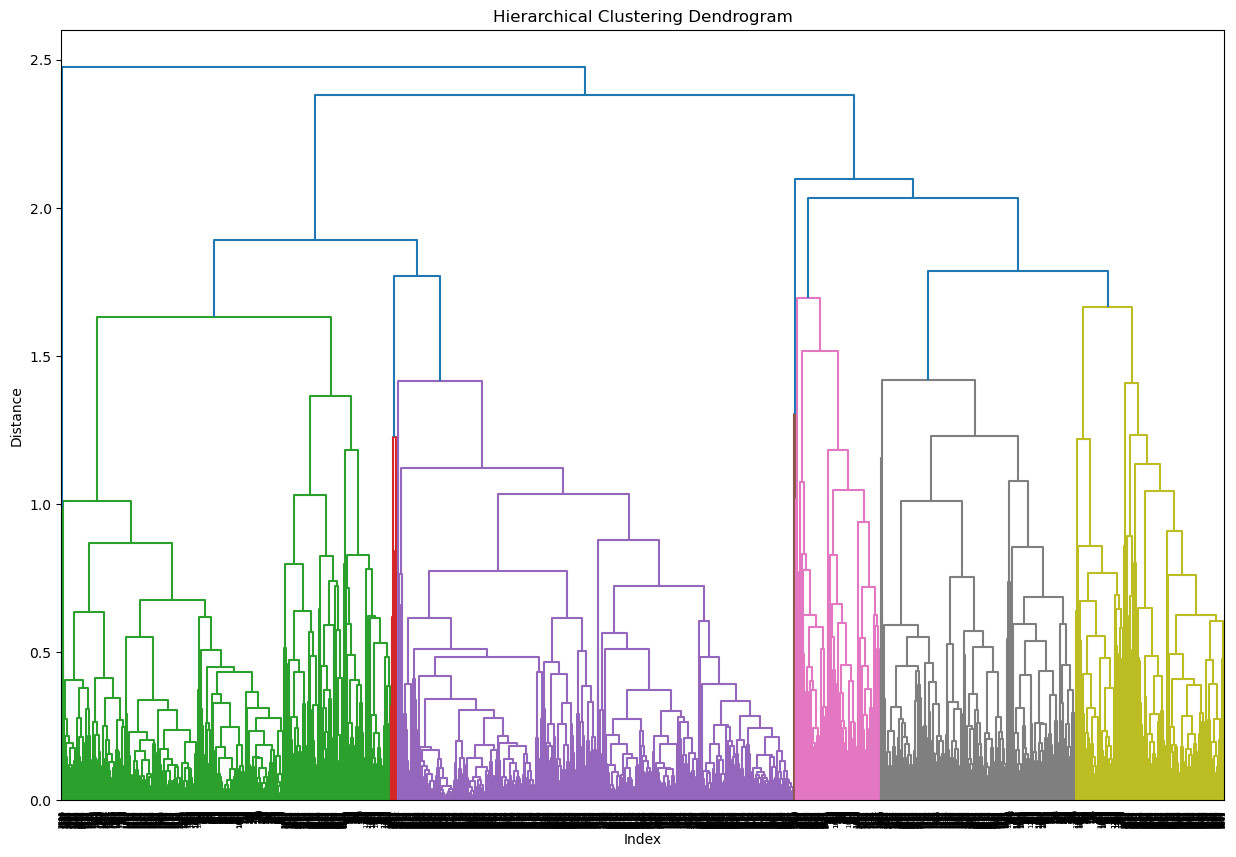

In [44]:
#HIERARCHICAL CLUSTER

import scipy.cluster.hierarchy as sch
linkage = sch.linkage(scaled_airline, method="complete",metric="euclidean")
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(linkage)
plt.show()

#(the dendogram(used in the tree) is used to represent the hirerchale cluster)

In [45]:
complete= AgglomerativeClustering(n_clusters=5, linkage='complete', affinity='euclidean').fit(scaled_airline) 
cluster_label= pd.Series(complete.labels_)
cluster_label
airline['clust']= cluster_label
airline

#(here we can see that which data belong to which cluster)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [48]:
#KMEANS CLUSTER

std_scaler= StandardScaler()
std_scaled_air= std_scaler.fit_transform(airline)
std_scaled_air

#(here we are using standard scaler in KMeans)

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
         1.39545434e+00, -7.66919299e-01, -7.36283680e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
         1.37995704e+00, -7.66919299e-01, -7.36283680e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
         1.41192021e+00, -7.66919299e-01, -7.36283680e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -1.31560393e+00,  1.30391816e+00,  1.45612022e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -1.31608822e+00, -7.66919299e-01, -7.36283680e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -1.31754109e+00, -7.66919299e-01, -7.36283680e-01]])

In [53]:
wcss=[]  #(within cluster sum of square)
for i in range(1, 11):
    kmeans= KMeans(n_clusters=i, random_state=0)
    kmeans.fit(std_scaled_air)
    wcss.append(kmeans.inertia_)  #inertia is other name for WCSS
    
#(here we can see the decrease in wcss statrs to slow down and also estimates the resonable no. of clusters)    

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\clust

Text(0, 0.5, 'wcss')

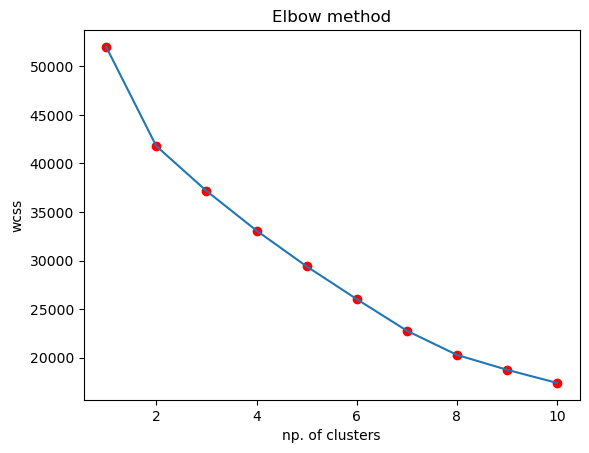

In [94]:
plt.plot(range(1,11), wcss)
plt.scatter(range(1, 11), wcss,color='red')
plt.title('Elbow method')
plt.xlabel('np. of clusters')
plt.ylabel('wcss')

In [64]:
clusters= KMeans(6, random_state=42)
clusters.fit(std_scaled_air)

#(here we have choosen the 6 clusters)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [65]:
clusters.labels_

array([5, 5, 5, ..., 1, 0, 0])

In [78]:
airline['cluster_cntr']= clusters.labels_ 
clusters.cluster_centers_

array([[ 1.00810596e+00, -3.48308527e-01, -6.49091019e-02,
        -5.02768327e-01, -2.75984028e-03, -5.85190496e-02,
        -4.70692066e-01, -4.29064892e-01, -1.96491455e-01,
        -2.30116973e-01, -1.00323414e+00, -7.66919299e-01,
        -7.36283680e-01],
       [-5.40340686e-02, -1.55314559e-01,  5.23919933e-02,
        -1.44487042e-01,  2.07237987e-02, -6.27665798e-02,
        -1.94366677e-01, -3.73036330e-02, -4.19072444e-02,
        -3.97504207e-02,  6.78779640e-02,  1.30391816e+00,
         1.44168068e+00],
       [-4.97327151e-01,  7.85407152e-01,  2.11561561e-02,
         1.63067264e+00, -7.84070152e-02, -5.52665484e-02,
         1.55287284e+00,  9.37230291e-01, -1.18759781e-02,
        -6.34227378e-05,  4.98834068e-01,  6.00500458e-01,
         3.19793747e-01],
       [-3.01165274e-01,  1.36398303e+00,  9.28948830e-01,
         1.38358827e-01,  2.19271022e-01, -6.27665798e-02,
         7.38825291e-01,  1.85248859e+00,  3.91495412e+00,
         4.28903939e+00,  3.36700698e

In [69]:
airline.groupby('cluster_cntr').agg(['mean']).reset_index()

,cluster_cntr,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,3184.846600,38504.693201,93.902985,1.367330,1.014096,1.000829,5778.598673,7.481758,184.961028,0.500829,2047.004975,0.000000,0.000000
1,1,1953.942857,57883.091209,184.846154,1.859341,1.017582,1.000000,12451.320879,11.224176,401.825275,1.224176,4255.403297,1.000000,1.986813
2,2,1435.921053,152693.597953,160.245614,4.302632,1.002924,1.001462,54581.812865,20.614035,442.780702,1.371345,5151.700292,0.660819,0.964912
3,3,1665.281250,211040.437500,862.718750,2.250000,1.046875,1.000000,34985.960938,29.390625,5941.125000,17.640625,4813.804688,0.867188,1.632812
4,4,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,0.600000
5,5,1153.362689,58423.217803,69.733902,1.526515,1.016098,1.000947,6668.055871,8.405303,170.561553,0.525568,5605.943182,0.000000,0.000000


In [84]:
#DBSCAN

airline_1= airline.drop(columns=['cc1_miles', 'cc2_miles', 'cc3_miles', 'ID#', 'Award?'])
airline_1


,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clust,cluster_cntr
0,28143,0,174,1,0,0,7000,0,5
1,19244,0,215,2,0,0,6968,0,5
2,41354,0,4123,4,0,0,7034,0,5
3,14776,0,500,1,0,0,6952,0,5
4,97752,0,43300,26,2077,4,6935,2,2
...,...,...,...,...,...,...,...,...,...
3994,18476,0,8525,4,200,1,1403,2,1
3995,64385,0,981,5,0,0,1395,2,1
3996,73597,0,25447,8,0,0,1402,2,1
3997,54899,0,500,1,500,1,1401,0,0


In [91]:
stdscler= StandardScaler()
x= stdscler.fit_transform(airline_1.values)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.02786266e-01, ...,
         1.39545434e+00, -7.36283680e-01,  1.52695249e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.01088399e-01, ...,
         1.37995704e+00, -7.36283680e-01,  1.52695249e+00],
       [-3.20031232e-01, -1.86298687e-01, -5.39252702e-01, ...,
         1.41192021e+00, -7.36283680e-01,  1.52695249e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  3.43803696e-01, ...,
        -1.31560393e+00,  1.45612022e+00, -5.09663205e-01],
       [-1.85606976e-01, -1.86298687e-01, -6.89286154e-01, ...,
        -1.31608822e+00, -7.36283680e-01, -1.01881713e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.09991847e-01, ...,
        -1.31754109e+00, -7.36283680e-01, -1.01881713e+00]])

In [108]:
model1= DBSCAN(eps= 0.45, min_samples=5)
model1.fit(x)

DBSCAN(eps=0.45)

In [118]:
airline_1['cluster']= model2.labels_
airline_1.cluster.value_counts()

 7     1100
 0      966
-1      937
 1      761
 3      125
 2       47
 8       31
 10      11
 4        8
 5        5
 6        4
 9        4
Name: cluster, dtype: int64

In [114]:
model2= DBSCAN(eps=0.6, min_samples=4)
model2.fit(x)

DBSCAN(eps=0.6, min_samples=4)

In [115]:
model2.labels_

array([0, 0, 0, ..., 1, 7, 7], dtype=int64)

In [120]:
airline_1.cluster.value_counts()

 7     1100
 0      966
-1      937
 1      761
 3      125
 2       47
 8       31
 10      11
 4        8
 5        5
 6        4
 9        4
Name: cluster, dtype: int64

In [117]:
airline_1.iloc[:,1:].groupby('cluster').agg(['mean']).reset_index()

,cluster,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust,cluster_cntr
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,152854.320171,615.062967,2.756670,1.014941,1.050160,35423.003202,19.639274,1662.449306,4.844184,4637.596585,0.659552,1.123799,1.981857
1,0,52873.456522,0.000000,1.535197,1.016563,1.001035,6544.028986,8.187371,82.225673,0.280538,5610.409938,0.000000,0.000000,5.000000
2,1,44688.455979,0.000000,2.198423,1.013141,1.000000,15575.947438,11.156373,148.741130,0.477004,4423.634691,1.000000,2.000000,1.136662
3,2,82510.851064,0.000000,5.000000,1.000000,1.000000,63542.723404,17.042553,74.468085,0.276596,5804.382979,1.000000,1.000000,2.000000
4,3,131696.784000,0.000000,4.264000,1.008000,1.000000,45592.928000,16.368000,70.784000,0.176000,4824.824000,0.000000,0.000000,2.000000
5,4,245952.875000,0.000000,4.125000,1.000000,1.000000,43180.125000,14.500000,18.750000,0.250000,6447.875000,0.000000,0.000000,2.000000
6,5,210210.400000,0.000000,1.000000,1.000000,1.000000,10100.000000,3.400000,0.000000,0.000000,5818.600000,1.000000,2.000000,1.000000
7,6,280658.250000,0.000000,5.000000,1.000000,1.000000,63595.750000,16.500000,750.000000,1.750000,5969.750000,1.000000,1.000000,2.000000
8,7,34796.120909,0.000000,1.354545,1.015455,1.000909,5498.564545,7.093636,63.626364,0.230909,2044.670000,0.000000,0.000000,0.000000
